# Reeb Graph Matching
#### Implementing 'Topology Matching for Fully Automatic Similarity Estimation of 3D Shapes'
#### http://graphics.stanford.edu/courses/cs468-08-fall/pdf/Hilaga01.pdf
#### (Hilaga et al., 2001)

In [1]:
import numpy as np
import os
from os.path import isfile, join
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csd_functions
import scipy
import networkx as nx
import reeb_matching
from copy import deepcopy
sns.set()


Load tree data

In [2]:
prefix = 'input_strength032320'
node_points, node_connectivity, node_color = csd_functions.load_tree(prefix)

Compute multiresoluion reeb graph

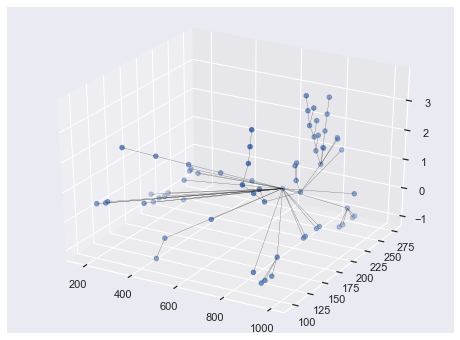

In [3]:
G = nx.Graph()
G.add_edges_from(node_connectivity)

node_attributes = {node_id : {'Position' : node_points[node_id,:], 'Visited' : 0, 'Merged':[],'Inserted':[],'New_Merge':[]} for node_id in list(G.nodes)}
nx.set_node_attributes(G,node_attributes)

interval_dict = reeb_matching.compute_intervals(node_points, 10)
reeb_matching.graph_search(G, 592, interval_dict,0)
reeb_matching.plot_graph(G)

G.clear()

Build attribute dictionary for MRG

In [4]:
#Load tree into graph
G = reeb_matching.make_graph(node_points,node_connectivity)
A = reeb_matching.make_graph(node_points,node_connectivity)


resolution_list = [8,4,2]
# resolution_list = [128,64,32,16]
# resolution_list = [10,9,8,6]

att_dict = reeb_matching.MRG_attributes(G, resolution_list)



________________
49 Total
49 Test Total
________________
29 Total
49 Test Total
0 Count: 6
[1322, 553, 548, 1247, 1286]
560 Count: 1
[]
561 Count: 1
[]
563 Count: 1
[]
564 Count: 1
[]
565 Count: 1
[]
568 Count: 1
[]
571 Count: 3
[570, 581]
587 Count: 1
[]
589 Count: 1
[]
1165 Count: 1
[]
1167 Count: 1
[]
1170 Count: 1
[]
1171 Count: 1
[]
1175 Count: 1
[]
1177 Count: 1
[]
1180 Count: 1
[]
1183 Count: 4
[1216, 1220, 1215]
1184 Count: 1
[]
1194 Count: 2
[1223]
1195 Count: 1
[]
1196 Count: 1
[]
1198 Count: 1
[]
1274 Count: 5
[1212, 1219, 1210, 1222]
1323 Count: 2
[577]
1324 Count: 2
[1249]
1325 Count: 2
[591]
1326 Count: 2
[1327]
1328 Count: 2
[592]
________________
11 Total
49 Test Total
0 Count: 28
[1322, 553, 548, 1247, 1286, 1180, 1196, 1165, 1171, 1195, 1198, 1274, 1212, 1219, 1210, 1222, 1194, 1223, 1177, 1175, 1184, 1183, 1216, 1220, 1215, 1167, 1170]
560 Count: 1
[]
561 Count: 1
[]
563 Count: 1
[]
564 Count: 1
[]
565 Count: 1
[]
568 Count: 1
[]
571 Count: 6
[570, 581, 589, 1328, 59

In [5]:
print(att_dict.keys())
total = np.sum([att_dict[idx]['Proportion'] for idx in att_dict.keys()])

print(total)

dict_keys([0, 560, 561, 563, 564, 565, 568, 571, 1323, 1324, 1326])
1.0
